In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')
print(df.shape)
df.head(10)

(5171, 4)


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\topic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def preprocess (text):
    tokens=nltk.word_tokenize(text.lower())
    tokens=[t for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

In [5]:
df['processed_text']=df['text'].apply(preprocess)

In [6]:
df.head()

,Unnamed: 0,label,text,label_num,processed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january see attached file hpln...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian springs deal book teco pvr reve...


In [8]:
spam_words=' '.join(df[df['label_num']==1]['processed_text'].values)
ham_words=' '.join(df[df['label_num']==0]['processed_text'].values)
#spam_words

In [9]:
wordcloud_spam=WordCloud(width=800,height=400).generate(spam_words)
wordcloud_ham=WordCloud(width=800,height=400).generate(ham_words)

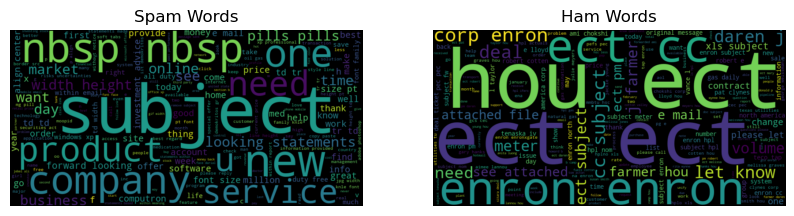

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(wordcloud_spam,interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_ham,interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')
plt.show()

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df['processed_text'],df['label_num'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4136,), (1035,), (4136,), (1035,))

In [12]:
vectorizer=TfidfVectorizer(max_features=4136)
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)
X_train_tfidf

<4136x4136 sparse matrix of type '<class 'numpy.float64'>'
	with 190822 stored elements in Compressed Sparse Row format>

In [14]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(4136,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\topic\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.fit(X_train_tfidf,y_train,epochs=10,batch_size=32,validation_data=(X_test_tfidf,y_test))

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7586 - loss: 0.5096 - val_accuracy: 0.9787 - val_loss: 0.0739
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9954 - loss: 0.0371 - val_accuracy: 0.9903 - val_loss: 0.0407
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9988 - loss: 0.0116 - val_accuracy: 0.9865 - val_loss: 0.0393
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0043 - val_accuracy: 0.9845 - val_loss: 0.0447
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 0.9855 - val_loss: 0.0428
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9855 - val_loss: 0.0434
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9874 - val_loss: 0.0427
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0

In [17]:
y_pred=model.predict(X_test_tfidf)
y_pred_class=(y_pred>0.5).astype(int)
conf_mat=confusion_matrix(y_test,y_pred_class)
accuracy=accuracy_score(y_test,y_pred_class)
print('Confusion Matrix:\n',conf_mat)
print('Accuracy:',accuracy*100)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[738   4]
 [ 12 281]]
Accuracy: 98.45410628019323


In [20]:
new_email=['Hey there! I want to buy your youtube channel. Feel free to contact.']
new_email_tfidf=vectorizer.transform(new_email)
prediction=model.predict(new_email_tfidf)
print('Prediction:',prediction*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: [[93.88884]]


In [21]:
if prediction>0.5:
    print('Spam Email')
else:
    print('Ham Email')

Spam Email
